In [24]:
from google.colab import drive

drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd '/content/gdrive/My Drive/Datathon/'

/content/gdrive/.shortcut-targets-by-id/1KAt26RbjXVUTFl0HeTcsLK0FcXRAYiWe/Datathon


In [26]:
import pandas as pd
import pickle

In [32]:
from torchtext.vocab import GloVe
import nltk.data
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###Correlations by date

####Data Wrangling

In [34]:
#mean glove embedding for employment
def get_average_glove_embedding(sentence):
    tokenized = nltk.word_tokenize(sentence.lower())
    # print(tokenized)
    vectors = [glove[word.lower()].numpy() for word in sentence.split()]
    # print(type(vectors), len(vectors), vectors[0].shape)
    vectors = np.mean(np.stack(vectors), axis=0)
    return vectors

In [35]:
glove = GloVe(cache='.', name='6B')

In [37]:
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [5]:
datasets = ['fed', 'dow', 'sp', 'treasury', 'unrate', 'vix']

In [6]:
df = pd.read_csv('./Data/all-accepted-with-rates.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,60,119,130,131,132,135,136,137,140,146,147,148,154,155,156,158) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
from collections import Counter
def find_counts(x):
    k = list(Counter(x).keys()) 
    v = list(Counter(x).values())

    for i in range(len(k)):
        print(f'{k[i]}: {v[i]}')

    return k, v

In [8]:
purposes, _ = find_counts(list(df['purpose']))

debt_consolidation: 1146650
small_business: 19952
home_improvement: 136961
major_purchase: 44475
credit_card: 468324
other: 126119
house: 12617
vacation: 14216
car: 20447
medical: 25216
moving: 13736
renewable_energy: 1217
wedding: 20
educational: 2


In [9]:
def convert(lst):
    res_dct = {purposes[i]: i for i in range(0, len(purposes))}
    return res_dct

In [10]:
purposes_dict = convert(purposes)

In [11]:
purposes_dict['educational']

13

In [12]:
df['emp_title']

0                              leadman
1                             Engineer
2                         truck driver
3          Information Systems Officer
4                  Contract Specialist
                      ...             
2029947                  Unit Operator
2029948         Database Administrator
2029949                Vice President 
2029950                Program Manager
2029951    Customer Service Technician
Name: emp_title, Length: 2029952, dtype: object

In [60]:
df['emp_title'] = df['emp_title'].astype('string')

In [13]:
for column in datasets:
    df = df[df[column] != '.']
    df[column] = df[column].astype('float')

In [14]:
purpose_num = [purposes_dict[purpose] for purpose in df['purpose']]

In [15]:
df['purpose_num'] = purpose_num

In [54]:
# load
with open('mlp_isoc.pkl', 'rb') as f:
    mlp = pickle.load(f)

In [61]:
[int(mlp.predict([get_average_glove_embedding(x)])) for x in df['emp_title']]

AttributeError: ignored

In [58]:
pd.set_option("display.max_columns", None)

In [18]:
df_by_dates = df.groupby('dates').mean()

In [19]:
df_by_dates.to_csv('avg_data_with_dates.csv')

####Experimentation

In [20]:
df_by_dates.head(5)

,id,number,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,fed,dow,sp,treasury,unrate,vix,purpose_num
dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01,1.043786e+07,2.775915,NaN,14890.921743,14890.921743,14882.086639,14.209685,457.798240,75459.304359,17.521056,0.339263,691.784617,695.784681,0.824162,33.342227,74.270508,11.668352,0.234643,15800.592270,56.796921,26.606540,0.963578,0.963123,16884.678420,16874.705176,13331.485417,3341.669200,1.093617,210.430223,31.163008,4546.262631,680.802598,667.047607,0.014717,41.614224,1.0,NaN,NaN,0.004735,247.721397,140738.878423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29372.357115,NaN,NaN,NaN,4.256591,13556.879183,8092.126315,65.566817,0.012350,9.129639,130.702505,188.221334,12.816867,7.845662,1.971973,24.252676,39.410748,7.078830,35.052770,0.499744,3.755567,5.945227,4.740466,9.098029,8.546775,8.331200,15.790312,5.919184,11.612362,0.000991,0.003007,0.097517,1.869081,94.453878,50.710180,0.138341,0.060020,170516.928910,46493.677566,19375.158242,38821.597709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,116.160500,3.0,11.600000,348.918000,7756.348500,198.697000,4234.858894,45.685619,7.597345,0.07,16441.35,1831.98,2.61,6.6,14.23,1.653762
2014-02,1.170352e+07,2.852381,NaN,15068.892855,15068.892855,15061.161504,14.314247,460.094060,76140.629388,17.527439,0.331325,692.279783,696.279783,0.818652,33.006094,73.080668,11.510577,0.241994,16029.536577,57.132499,26.215993,2.547623,2.547203,17122.186148,17113.478583,13425.301313,3476.466368,1.275543,219.142938,32.977639,4527.701654,680.159277,665.105442,0.013950,41.106095,1.0,NaN,NaN,0.005894,215.921016,140057.256926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29967.607767,NaN,NaN,NaN,4.201388,13728.599450,8400.984742,65.648020,0.011134,11.132884,129.053488,190.266946,13.369834,8.139891,1.993582,25.216341,39.603905,7.106669,35.342297,0.513393,3.726963,5.856441,4.723885,8.964700,8.326609,8.280765,15.614120,5.824481,11.456611,0.001289,0.003537,0.093981,1.863252,94.378355,52.334570,0.141529,0.067522,170174.824808,46094.455629,19932.777327,38174.036348,NaN,NaN,NaN,NaN,NaN,NaN

####Correlations

In [21]:
#define function for visualizing correlations
def corr(ATTRIBUTE):
    datasets = ['fed', 'dow', 'sp', 'treasury', 'unrate', 'vix']
    new_df = df_by_dates[[ATTRIBUTE] + datasets]
    corr_mat = new_df.corr()

    plt.figure(figsize=(9,9))
    sns.heatmap(corr_mat, annot = True)

    plt.show()

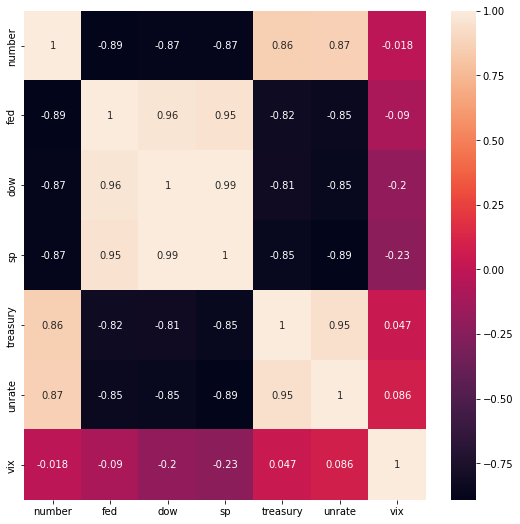

In [ ]:
corr('number')

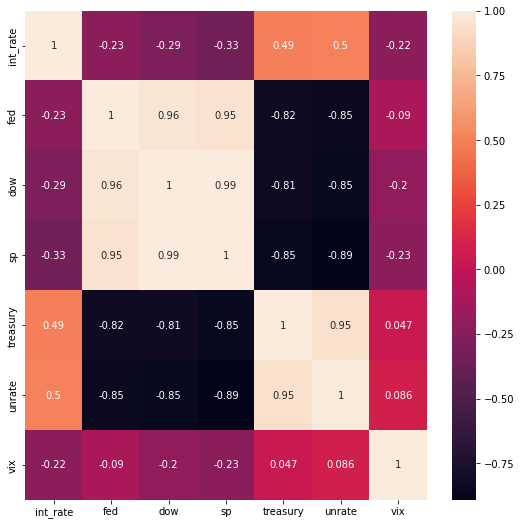

In [ ]:
corr('int_rate')

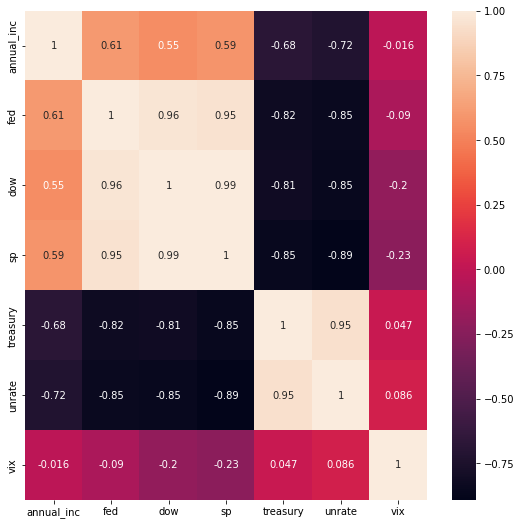

In [22]:
corr('annual_inc')

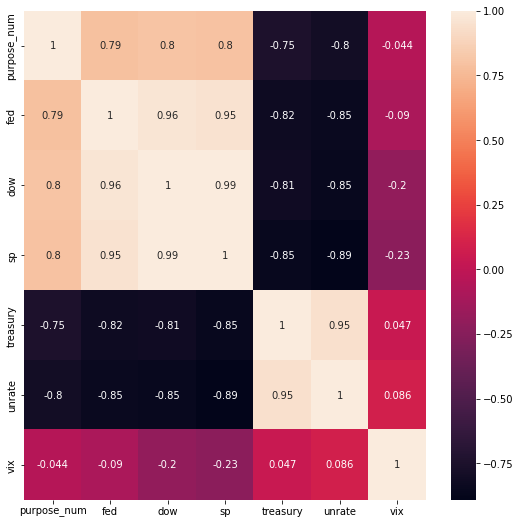

In [23]:
corr('purpose_num')

###Old work

In [ ]:
df = pd.read_csv('./Data/grades-with-averages.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6,7,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,grade,number,issue_d,dates,fed,dow,sp,treasury,unrate,vix
0,C,3,Dec-2015,2015-12,0.24,17888.35,2102.63,1.24,5.0,14.67
1,C,3,Dec-2015,2015-12,0.24,17888.35,2102.63,1.24,5.0,14.67
2,B,2,Dec-2015,2015-12,0.24,17888.35,2102.63,1.24,5.0,14.67
3,C,3,Dec-2015,2015-12,0.24,17888.35,2102.63,1.24,5.0,14.67
4,F,6,Dec-2015,2015-12,0.24,17888.35,2102.63,1.24,5.0,14.67
...,...,...,...,...,...,...,...,...,...,...
2029947,C,3,Oct-2016,2016-10,0.40,18253.85,2161.2,0.83,4.9,13.57
2029948,B,2,Oct-2016,2016-10,0.40,18253.85,2161.2,0.83,4.9,13.57
2029949,B,2,Oct-2016,2016-10,0.40,18253.85,2161.2,0.83,4.9,13.57
2029950,C,3,Oct-2016,2016-10,0.40,18253.85,2161.2,0.83,4.9,13.57


In [ ]:
df = df.drop('dates', axis=1)

In [ ]:
df

,grade,number,issue_d,fed,dow,sp,treasury,unrate,vix
0,C,3,Dec-2015,0.24,17888.35,2102.63,1.24,5.0,14.67
1,C,3,Dec-2015,0.24,17888.35,2102.63,1.24,5.0,14.67
2,B,2,Dec-2015,0.24,17888.35,2102.63,1.24,5.0,14.67
3,C,3,Dec-2015,0.24,17888.35,2102.63,1.24,5.0,14.67
4,F,6,Dec-2015,0.24,17888.35,2102.63,1.24,5.0,14.67
...,...,...,...,...,...,...,...,...,...
2029947,C,3,Oct-2016,0.40,18253.85,2161.2,0.83,4.9,13.57
2029948,B,2,Oct-2016,0.40,18253.85,2161.2,0.83,4.9,13.57
2029949,B,2,Oct-2016,0.40,18253.85,2161.2,0.83,4.9,13.57
2029950,C,3,Oct-2016,0.40,18253.85,2161.2,0.83,4.9,13.57


In [ ]:
for column in datasets:
    df = df[df[column] != '.']

In [ ]:
df = df.astype('float')

In [ ]:
df

,number,fed,dow,sp,treasury,unrate,vix
0,3.0,0.24,17888.35,2102.63,1.24,5.0,14.67
1,3.0,0.24,17888.35,2102.63,1.24,5.0,14.67
2,2.0,0.24,17888.35,2102.63,1.24,5.0,14.67
3,3.0,0.24,17888.35,2102.63,1.24,5.0,14.67
4,6.0,0.24,17888.35,2102.63,1.24,5.0,14.67
...,...,...,...,...,...,...,...
2029947,3.0,0.40,18253.85,2161.20,0.83,4.9,13.57
2029948,2.0,0.40,18253.85,2161.20,0.83,4.9,13.57
2029949,2.0,0.40,18253.85,2161.20,0.83,4.9,13.57
2029950,3.0,0.40,18253.85,2161.20,0.83,4.9,13.57


In [ ]:


# taking all rows but only 50 columns
# df_small = accepted_nums.iloc[:,:50]

correlation_mat = df.corr()

In [ ]:
correlation_mat

,number,fed,dow,sp,treasury,unrate,vix
number,1.000000,-0.120858,-0.117540,-0.117495,0.117449,0.118080,-0.004448
fed,-0.120858,1.000000,0.964800,0.958760,-0.845775,-0.869245,-0.087446
dow,-0.117540,0.964800,1.000000,0.995051,-0.817302,-0.864784,-0.203008
sp,-0.117495,0.958760,0.995051,1.000000,-0.844247,-0.890909,-0.232508
treasury,0.117449,-0.845775,-0.817302,-0.844247,1.000000,0.933398,0.038239
unrate,0.118080,-0.869245,-0.864784,-0.890909,0.933398,1.000000,0.077734
vix,-0.004448,-0.087446,-0.203008,-0.232508,0.038239,0.077734,1.000000


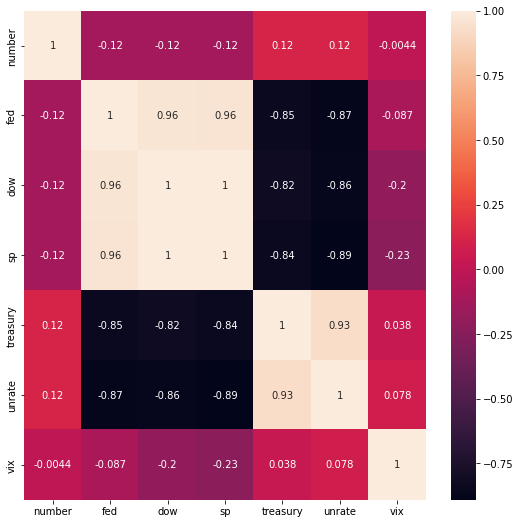

In [ ]:

plt.figure(figsize=(9,9))
sns.heatmap(correlation_mat, annot = True)

plt.show()

Grade (number) correlations w/ indices